In [4]:
import scipy.io as sio
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile
import shutil

In [2]:
word = 'n'

In [5]:
def corr2(a,b):
    k = np.shape(a)
    H=k[0]
    W=k[1]
    c = np.zeros((H,W))
    d = np.zeros((H,W))
    e = np.zeros((H,W))

    #Calculating mean values
    AM=np.mean(a)
    BM=np.mean(b)  

    #Calculating terms of the formula
    for ii in range(H):
        for jj in range(W):
            c[ii,jj]=(a[ii,jj]-AM)*(b[ii,jj]-BM)
            d[ii,jj]=(a[ii,jj]-AM)**2
            e[ii,jj]=(b[ii,jj]-BM)**2

    #Formula itself
    r = np.sum(c)/float(np.sqrt(np.sum(d)*np.sum(e)))
    return r

def getMaxIndex(gf_corr2d_path):
    gf_corr2d =sio.loadmat(gf_corr2d_path+'cor2D_test.mat')['corr2'][0]
    (maxCorr,maxIndex) = max((v,i) for i,v in enumerate(gf_corr2d))
    maxCorr= round(maxCorr, 2)
    return maxCorr,maxIndex

def get_gp_corr2d(gp_corr2d_path,maxIndex):
    gp_corr2d =sio.loadmat(gp_corr2d_path+'cor2D_test.mat')['corr2'][0]
    gp_corr2d = round(gp_corr2d[maxIndex], 2)
    return gp_corr2d

def get_gp_trainIndex(gp_corr2d_path):
    index =sio.loadmat(gp_corr2d_path+'cor2D_train.mat')['corr2'][0].shape[0]
    return index

def getSpec(ori_spec_path,gp_spec_path,gf_spec_path,maxIndex):
    gfFile = os.listdir(gf_spec_path)[maxIndex]
    
    index = get_gp_trainIndex(gp_corr2d_path)
    gpFile="{number:03}".format(number=(maxIndex+index))
    
    ori_spec = sio.loadmat(ori_spec_path+gfFile)['y']
    gp_spec=sio.loadmat(gp_spec_path+gpFile+'.mat')['audio_input']
    gf_spec=sio.loadmat(gf_spec_path+gfFile)['audio_input']
    
    return ori_spec,gp_spec,gf_spec

def plotSpec(oriSpec,compSpec,output_path,word,sys):
    figure1 = plt.figure(1,figsize=(3, 4.5))
    plt.title(sys+': corr2 = %.3f'%corr2(oriSpec,compSpec),fontsize=12,fontweight="bold",loc='right')
    plt.imshow(compSpec[35:195].T, origin="lower", aspect="auto", interpolation="none")
    figure1.savefig(output_path+word+'_'+sys+ '.png', dpi=figure1.dpi)
    
def getWav(ori_wav_path,gp_wav_path,gf_wav_path,maxIndex):
    gfFile = os.listdir(gf_wav_path)[maxIndex]
    
    index = get_gp_trainIndex(gp_corr2d_path)
    gpFile="{number:03}".format(number=(maxIndex+index))
    
    ori_wav = ori_wav_path+gfFile
    gp_wav=gp_wav_path+gpFile +'.wav'
    gf_wav= gf_wav_path+gfFile
    
    return ori_wav,gp_wav,gf_wav


def copyFile(original,audio_output,word,sys):
    target=audio_output+word+'_'+sys+ '.wav'
    shutil.copyfile(original, target)

def plotWav(inputPath, outputPath,word,sys):
    samplerate, data = wavfile.read(inputPath)
    plt.rcParams["figure.figsize"] = (4.5,2.8)
    print(data.shape)
    print(samplerate)
    plt.plot(data[3000:7500,])
    plt.ylim((-40000,40000))
    plt.ylabel("Amplitude")
    plt.xlabel("Time")
    plt.savefig(outputPath+word+'_'+sys+ '.png')

In [4]:
# load gf_corr2d to get the index of the max value
gf_corr2d_path = 'D:/Mrs_backup/speech_test/all_vocabulary/gf_model/13_gf_corr2D/'+word+'/'
maxCorr,maxIndex= getMaxIndex(gf_corr2d_path)
#maxIndex=2
print ('Maxmum correlation value is: '+str(maxCorr)+' on video: '+str(maxIndex))

Maxmum correlation value is: 0.85 on video: 5


In [5]:
# get gp corr2d from the maxIndex
gp_corr2d_path = 'D:/Mrs_backup/speech_test/all_vocabulary/gp_model/corr2D/'+word+'/'
gp_corr2d = get_gp_corr2d(gp_corr2d_path,maxIndex)
print ('GP correlation value is: '+str(gp_corr2d))

GP correlation value is: 0.52


In [6]:
# load original, gf and gp spectrogram based on the index and save it 
ori_spec_path = 'D:/Mrs_backup/speech_test/all_vocabulary/gf_model/03_audioSpec/'+word+'/'
gp_spec_path = 'D:/Mrs_backup/speech_test/all_vocabulary/gp_model/corr2D/'+word+'/test/'
gf_spec_path = 'D:/Mrs_backup/speech_test/all_vocabulary/gf_model/13_gf_corr2D/'+word+'/test/'

spec_output = 'C:/Users/sally/Desktop/anaysis_result/vocabulary/figure/spec/test/'

ori_spec,gp_spec,gf_spec = getSpec(ori_spec_path,gp_spec_path,gf_spec_path,maxIndex)

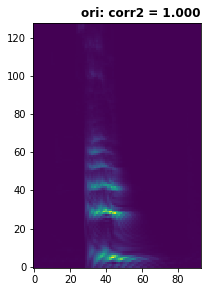

In [7]:
plotSpec(ori_spec,ori_spec,spec_output,word,sys='ori')

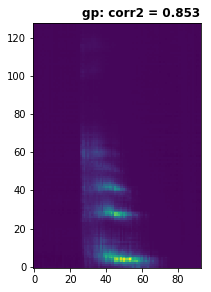

In [8]:
plotSpec(ori_spec,gp_spec,spec_output,word,sys='gp')

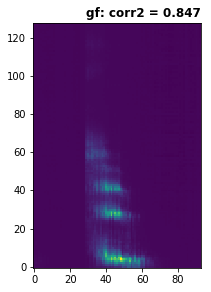

In [9]:
plotSpec(ori_spec,gf_spec,spec_output,word,sys='gf')

In [10]:
# load original, gf and gp waveform based on the index and save it 
ori_wav_path = 'D:/Mrs_backup/speech_test/all_vocabulary/02_audio/'+word+'/'
gp_wav_path = 'D:/Mrs_backup/speech_test/all_vocabulary/gp_model/pesq/'+word+'/test/'
gf_wav_path = 'D:/Mrs_backup/speech_test/all_vocabulary/gf_model/15_gf_pesq/'+word+'/test/'
wav_output = 'C:/Users/sally/Desktop/anaysis_result/vocabulary/figure/wav/test/'
audio_output = 'C:/Users/sally/Desktop/anaysis_result/vocabulary/audio/test/'

ori_wav,gp_wav,gf_wav= getWav(ori_wav_path,gp_wav_path,gf_wav_path,maxIndex)

In [11]:
copyFile(ori_wav,audio_output,word,sys='ori')
copyFile(gp_wav,audio_output,word,sys='gp')
copyFile(gf_wav,audio_output,word,sys='gf')

(8159,)
8000


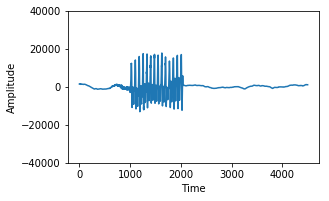

In [12]:
plotWav(ori_wav,wav_output,word,sys='ori')

(8192,)
8000


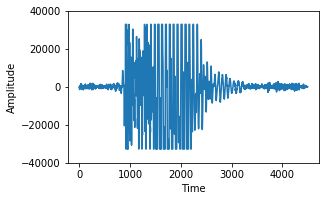

In [13]:
plotWav(gp_wav,wav_output,word,sys='gp')

(8192,)
8000


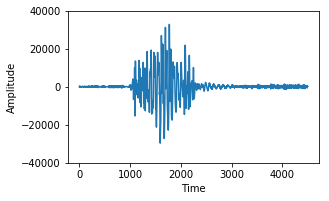

In [14]:
plotWav(gf_wav,wav_output,word,sys='gf')

In [1]:
word='place'

In [7]:
gp_wav = r'C:\Users\sally\Desktop\anaysis_result\vocabulary\clearAudio\test\command\place_gp.wav'
wav_output = 'C:/Users/sally/Desktop/anaysis_result/vocabulary/figure/wav/test/command/'

(8192,)
8000


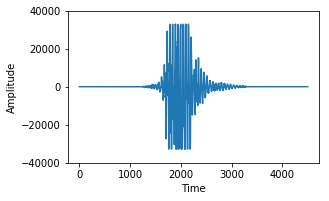

In [8]:
plotWav(gp_wav,wav_output,word,sys='gp')